<a href="https://colab.research.google.com/github/tytyty93/LazyProgrammer/blob/master/LP_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retrieving and Loading Data

In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

data = pd.read_csv('moore.csv', header=None).values  # If you never put the .values, it will load the data as it is. You put values it will convert to array data

X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1 as this is what tensorflow and keras expects only!
                             # The -1 is just a lazy method of telling the system to figure out what the number of rows should be according to the data
Y = data[:,1]  # Can leave Y as 1D array as they are the labels

--2020-06-12 03:22:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-06-12 03:22:54 (34.9 MB/s) - ‘moore.csv’ saved [2302/2302]



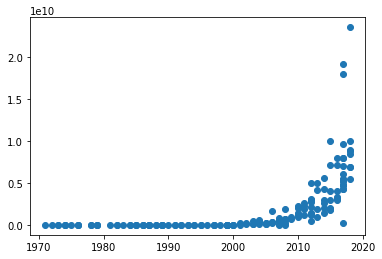

In [3]:
plt.scatter(X,Y)

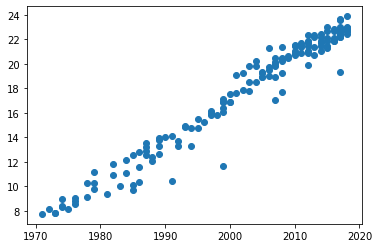

In [4]:
Y = np.log(Y)
plt.scatter(X,Y)

# Scaling the Data

In [0]:
X = X-X.mean()  # By doing this, we can center the X around 0
                # Can do the scaling la but an increase in 1 in X variable will no longer represent 1 year.

# Creating the model

In [6]:
import tensorflow as tf
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),  # Consider the input layer as a dummy layer to keep track of the input size
                                    tf.keras.layers.Dense(1)  # Do note that we are not putting in the activation function as this is a regression problem
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')  #0.001:Learning Rate, 0.9:Momentum(Read below for details)

# Define the learning rate Scheduler

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,Y,epochs = 200, callbacks=[scheduler])  # Do note that the callbacks dont take in string ah

# (Basically taking the moving average of the weights to smoothen(reduce noise) the Gradient Descent. The higher the value, the more 'noise' it will be as we are putting emphasis on the X1.
#  So if you want a much smoother descent, should get it lower.)
# https://www.youtube.com/watch?v=CKLwvuKWQjo  if still you don't understand.

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 393.3927 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 281.7921 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 248.6918 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 195.4809 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 205.8428 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 158.3245 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 117.8490 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 98.8063 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 64.2936 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 41.1537 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 

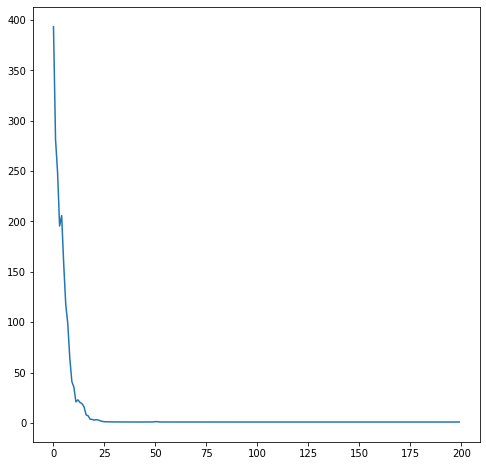

In [7]:
plt.figure(figsize=(8,8))
plt.plot(r.history['loss'], label='loss')

# Making Predictions

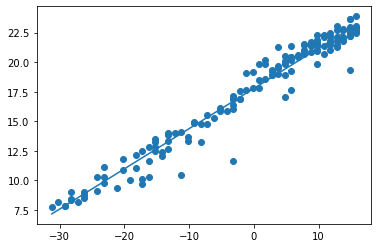

In [14]:
Yhat = model.predict(X).flatten()  # We need to flatten the output so that the Yhat is the exact shape as Y
plt.scatter(X,Y) # Plotting the exact answers
plt.plot(X, Yhat) # Plotting the predictions

In [12]:
w,b = model.layers[0].get_weights() #Get the weights from Dense layer.

X = X.reshape(-1,1) # We have to reshape it to n by 1 array now as we flattened it earlier

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat,Yhat2) # Comparing Yhat to Yhat2 which should be the same as we are just proving it by manual calculation here

True

In [15]:
w

array([[0.340132]], dtype=float32)

In [16]:
b

array([17.775192], dtype=float32)

In [17]:
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9